# Problem 1: Extending the Lady Tasting Tea #

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

## Import Packages ##

Begin by importing the packages required to perform the simulation of this experiment.

In [319]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

## Theoretical Probability ##

Set variables for total cups of tea and the number of cups with tea or milk first.

In [289]:
# Total number of cups of tea.
no_cups = 12

# Number of cups with tea first.
no_cups_tea_first = 8

# Number of cupts with milk first.
no_cups_milk_first = 4

Calculate the number of ways (combinations) to choose **k** elements from a set of **n** elements where the order of the chosen elements (permutations) does not matter and no element is selected more than once.   
We can compute the number of combinations using:

$\binom{n}{k} = \frac{n!}{k! \, (n-k)!}$

Where:  
**n** = Number of cups of tea in total.  
**k** = Number of cups of tea with milk in first.  

In [290]:
# Number of ways of selecting four cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show
ways

495

There are 495 ways of selecting 4 cups out of 12 cups in total, when ordering does not matter and no element is selected more than once.   
Only one of these combinations of 4 cups will contain all the '*no_cup_milk_first*' cups of tea.  
Mathematically, there is a 1/495 chance (~.2%) of correctly selecting the 4 cups with milk first out of the total pf 12 cups.

In [291]:
# Probability of randomly selecting the 4 cups with milk first:
1/ways

0.00202020202020202

The probability of randomly selecting the 4 cups with milk first is the same as the probability of randomly selecting the 8 cups with tea first because:

$\binom{12}{4} = \binom{12}{8} = 495$

If the 4 cups made with milk first are selected, then the remaining 8 made with tea first are also identified and all 12 cups have been distinguised.  

In [292]:
# Number of ways of selecting eight cups from twelve.
alt_ways = math.comb(no_cups, no_cups_tea_first)

#Show
print(alt_ways)

# Probability of randomly selecting the 8 cups with tea first:
1/alt_ways

495


0.00202020202020202

We expect the results of our simulation to yield a similar probability.

## Experiment Simulation ##

Label the cups from 0 to 11 and randomly assign 4 cups of tea that are made with milk first.

In [315]:
# Label the cups as a list.
labels = list(range(no_cups))

# Take a random sample of 4 as milk-first cups. 
# https://docs.python.org/3/library/random.html#random.sample
labels_milk_first = random.sample(labels, 4)
labels_milk_first.sort()

# The remainder are the 8 cups made tea-first.
labels_tea_first = list(set(labels) - set(labels_milk_first))

print(f"The 12 labelled cups are {labels}")
print(f"The milk-first cups are {labels_milk_first}")
print(f"The tea-first cups are {labels_tea_first}")

The 12 labelled cups are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The milk-first cups are [0, 3, 8, 9]
The tea-first cups are [1, 2, 4, 5, 6, 7, 10, 11]


Shuffle the cups once using numpy. The first k cups represents the participant's selection and compare this with the pre-assigned milk-first cups.

In [316]:
print(f"The milk-first cups are {labels_milk_first}")

# Create a random number generator
rng = np.random.default_rng(seed=None)  

# Shuffle the cups using rng.permutation function
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html
shuffled = rng.permutation(labels)

# Simulate participant's guess: first k cups
k = len(labels_milk_first)
guess_milk = shuffled[:k]

# Sort for comparison purposes
guess_milk.sort()

print(f"The participant's selection is {list(guess_milk)}")

if set(guess_milk) == set(labels_milk_first):
    print(f"The participant has correctly selected all {k} milk-first cups")
else:
    print(f"The participant has not correctly selected all {k} milk-first cups")

The milk-first cups are [0, 3, 8, 9]
The participant's selection is [2, 3, 4, 11]
The participant has not correctly selected all 4 milk-first cups


Extend to randomly shuffle the cups many times and calculate the simulated probability of the participant correctly identifying all cups by chance.

In [317]:
def simulate_probability(labels, labels_milk_first, no_sims=1_000_000, seed=None):

    """
    Estimate the probability of correctly identifying all milk-first cups by random guessing.

    Parameters:
    labels: Labels of all cups
    labels_milk_first: Labels of cups made with milk first
    no_sims: Number of simulations (default 1,000,000)
    seed: Random seed for reproducibility (default None)

    Returns proportion of simulations where all milk-first cups are correctly identified.
    """

    # Shuffle the cups using rng.permutation function
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html
    rng = np.random.default_rng(seed)
    perm = rng.permutation
    
    # Turn labels into a numpy array for shuffling all cups of tea.
    labels = np.array(labels)
    # Turn labels_milk_first into a set for order independent comparison
    milk_set = set(labels_milk_first)
    # number of milk first cups
    k = len(labels_milk_first) 
    
    # start success counter
    success = 0 

    # Loop through simulations.
    for _ in range(no_sims):
        # shuffle all cups
        shuffled = perm(labels)
        # take first k as participant's simulated guess for milk first cups of tea
        guess_milk = set(shuffled[:k])  
        
        # compare guessed cups with milk-first-labelled cups and increase counter if they match (correct guess)
        if guess_milk == milk_set:
            success += 1

    return success / no_sims

In [318]:
# Use p_sim, to call the function and return the estimated probability based on the simulation.
p_sim = simulate_probability(labels, labels_milk_first)
p_sim

0.002011

The simulated probability (p_sim) closely matches the theoretical probability previously computed as 1/495 = ~0.2%, validating the correctness of our simulation approach.

## Comparison with Original 8-cup Experiment. ##

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

Increasing the total number of cups while keeping the number of milk-first cups fixed **significantly increases the number of possible combinations** (from 70 to 495). This sharply **reduces the probability of a correct guess by chance**. In the original 8-cup experiment, the probability of correctly identifying all milk-first cups by chance is approximately 0.014, compared to a probability of ~.002 in the extended 12-cup experiment. In other words, in the **extended experiment** the participant is **~7 times less likely** to perfectly distinguish the cups of tea by chance. 

Due to this reduced probability, **stronger conclusions can be drawn** and a successful guess in the extended experiment provides substantially stronger evidence that the participant is able to "discriminate whether the milk or the tea infusion was first added to the cup".

**Table 1. Comparison of key metrics for the original experiment versus the extended experiment:**

| Feature | Original Experiment | Extended Experiment |
|--------|---------------------|---------------------|
| Total number of cups | 8 | 12 |
| Tea-first cups | 4 | 8 |
| Milk-first cups | 4 | 4 |
| Cups to identify correctly | 4 | 4 |
| Number of possible selections | 70 | 495 |
| p value | 0.0143 | 0.0020 |
| Reject H0 at 5% | Yes | Yes |
| Reject H0 at 1% | No | Yes |

*Note: The p-value represents the probability of randomly selecting all milk-first cups correctly.*

In the [original experiment](https://en.wikipedia.org/wiki/Lady_tasting_tea), Fisher was willing to reject the null hypothesis only if the lady could correctly categorize all 8 cups of tea, acknowledging the lady's ability at a 1.4% significance level.  The critical region for rejecting the null hypothesis was based on the conventional probability threshold of 5%. Fisher could not set a lower threshold of 1% because in that event, the null hypothesis would be rejected even if the lady correctly categorized all 8 cups (p value 0.143 > level of significance 0.01).

In the extended experiment, due to the reduced p-value there is scope to use a stricter threshold of 1%. With this threshold, the null will not be rejected if the participant correctly categorizes all 12 cups (p value 0.002 < level of significance 0.1).  Having said this, the probability of selecting given the very low p value, there is no need to 

## Hypothesis Testing & Signi##

The **null hypothesis** is that the participant is selecting the four cups at random.  
The **alternative hypothesis** is that the particpant is able to "discriminate whether the milk or the tea infusion was first added to the cup". 

## END ##

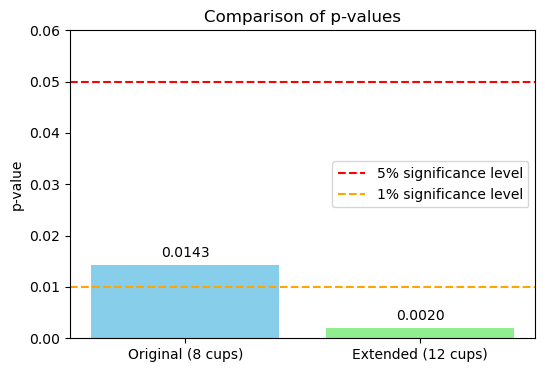

In [ ]:
# Experiment labels
experiments = ['Original (8 cups)', 'Extended (12 cups)']

# Corresponding p-values (probability of a randomly guessing correctly)
p_values = [1/70, 1/495]  # 0.0143 and 0.00202

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(experiments, p_values, color=['skyblue', 'lightgreen'])
plt.axhline(0.05, color='red', linestyle='--', label='5% significance level')
plt.axhline(0.01, color='orange', linestyle='--', label='1% significance level')

# Annotate bars with actual values
for bar, p in zip(bars, p_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{p:.4f}', ha='center', va='bottom')

plt.ylabel('p-value')
plt.title('Comparison of p-values')
plt.legend()
plt.ylim(0, 0.06)
plt.show()